### 2.2.2 练习： 探索性数据分析

In [ ]:
# 从网络加载数据源
 #data1 <- read.csv(url("http://stat.columbia.edu/~rachel/datasets/nyt1.csv"))

#从本地加载
data1 <- read.csv("./data/nyt1.csv")

In [2]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [2]:
data1$agecat <- cut(data1$Age,c(-Inf,0,18,24,34,44,54,64,Inf))
head(data1)

Age,Gender,Impressions,Clicks,Signed_In,agecat
36,0,3,0,1,"(34,44]"
73,1,3,0,1,"(64, Inf]"
30,0,3,0,1,"(24,34]"
49,1,3,0,1,"(44,54]"
47,1,11,0,1,"(44,54]"
47,0,11,1,1,"(44,54]"


In [23]:
# 预览
summary(data1)

      Age             Gender       Impressions         Clicks       
 Min.   :  0.00   Min.   :0.000   Min.   : 0.000   Min.   :0.00000  
 1st Qu.:  0.00   1st Qu.:0.000   1st Qu.: 3.000   1st Qu.:0.00000  
 Median : 31.00   Median :0.000   Median : 5.000   Median :0.00000  
 Mean   : 29.48   Mean   :0.367   Mean   : 5.007   Mean   :0.09259  
 3rd Qu.: 48.00   3rd Qu.:1.000   3rd Qu.: 6.000   3rd Qu.:0.00000  
 Max.   :108.00   Max.   :1.000   Max.   :20.000   Max.   :4.00000  
                                                                    
   Signed_In           agecat      
 Min.   :0.0000   (-Inf,0]:137106  
 1st Qu.:0.0000   (34,44] : 70860  
 Median :1.0000   (44,54] : 64288  
 Mean   :0.7009   (24,34] : 58174  
 3rd Qu.:1.0000   (54,64] : 44738  
 Max.   :1.0000   (18,24] : 35270  
                  (Other) : 48005  

In [24]:
# 分组
# install.packages("doBy")
library("doBy")
siterange <- function(x){c(length(x), min(x), mean(x), max(x))}
summaryBy(Age~agecat, data =data1, FUN=siterange)

agecat,Age.FUN1,Age.FUN2,Age.FUN3,Age.FUN4
"(-Inf,0]",137106,0,0.00000,0
"(0,18]",19252,7,16.03350,18
"(18,24]",35270,19,21.26904,24
"(24,34]",58174,25,29.50335,34
"(34,44]",70860,35,39.49468,44
"(44,54]",64288,45,49.49258,54
"(54,64]",44738,55,59.49819,64
"(64, Inf]",28753,65,72.98870,108


In [25]:
# 登录的用户才有性别和年龄
summaryBy(Gender+Signed_In+Impressions+Clicks~agecat,
data =data1)

agecat,Gender.mean,Signed_In.mean,Impressions.mean,Clicks.mean
"(-Inf,0]",0.0000000,0,4.999657,0.14207985
"(0,18]",0.6421151,1,4.998961,0.13105132
"(18,24]",0.5338531,1,5.006635,0.04845478
"(24,34]",0.5321621,1,4.993829,0.05048647
"(34,44]",0.5316963,1,5.021507,0.05167937
"(44,54]",0.5289790,1,5.010406,0.05027377
"(54,64]",0.5361885,1,5.022308,0.10183736
"(64, Inf]",0.3632664,1,5.012347,0.15128856


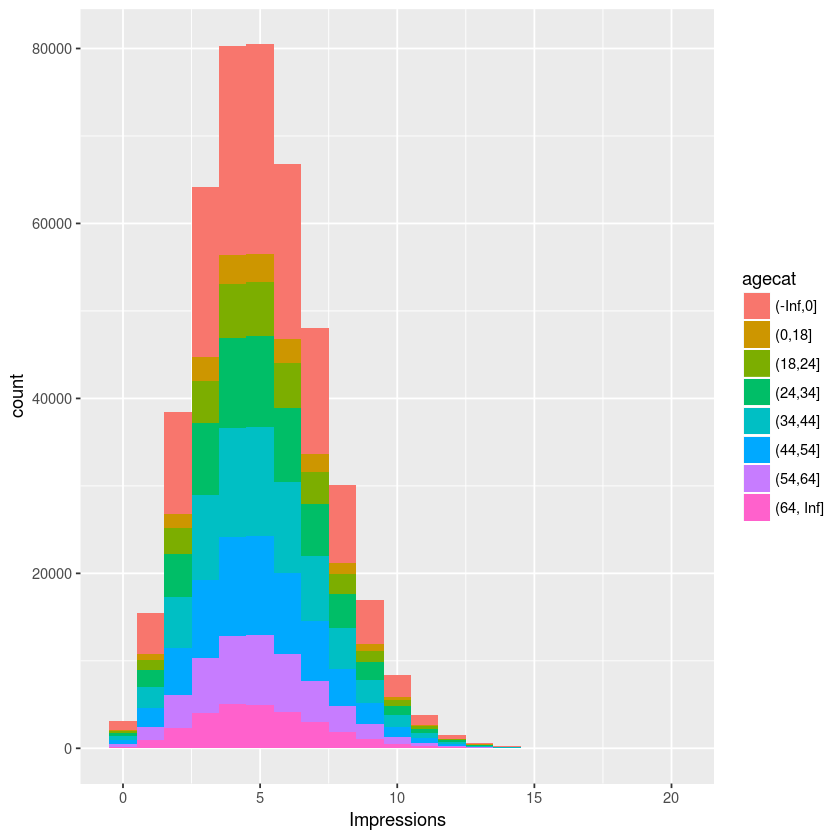

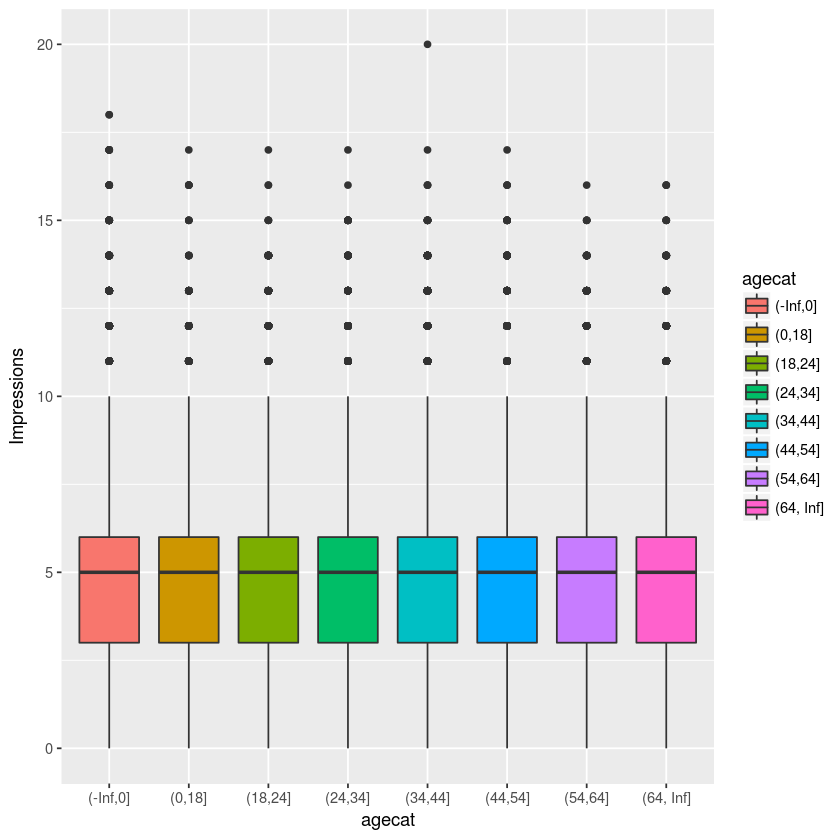

In [26]:
library(ggplot2)
ggplot(data1, aes(x=Impressions, fill=agecat))+geom_histogram(binwidth=1)
ggplot(data1, aes(x=agecat, y=Impressions, fill=agecat))+geom_boxplot()

hasimps,Clicks.FUN1,Clicks.FUN2,Clicks.FUN3,Clicks.FUN4
"(-Inf,0]",3066,0,0.00000000,0
"(0, Inf]",455375,0,0.09321768,4


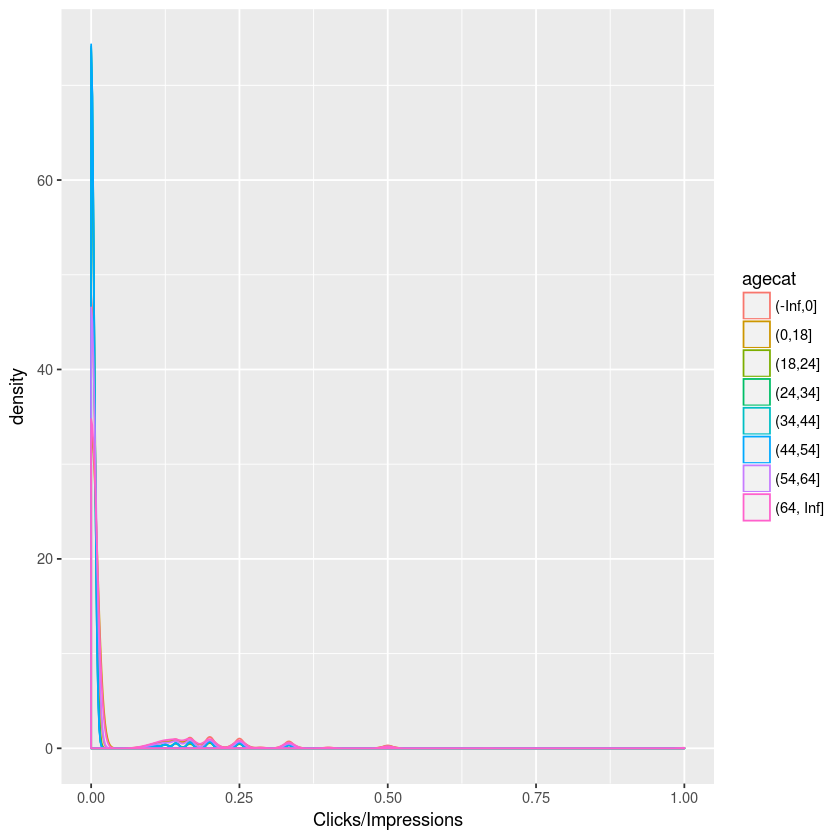

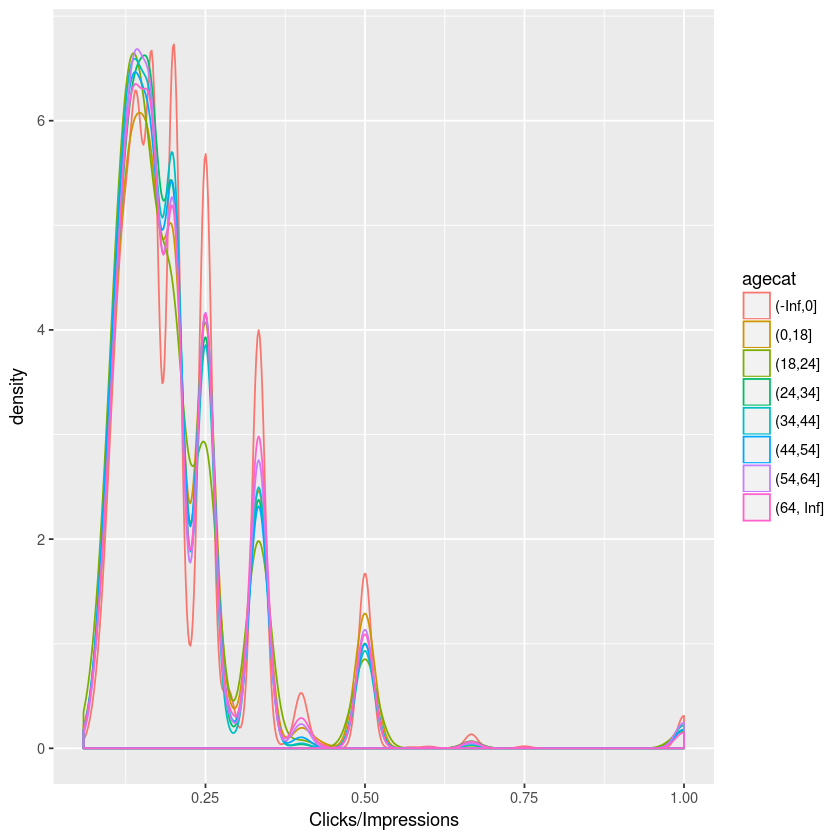

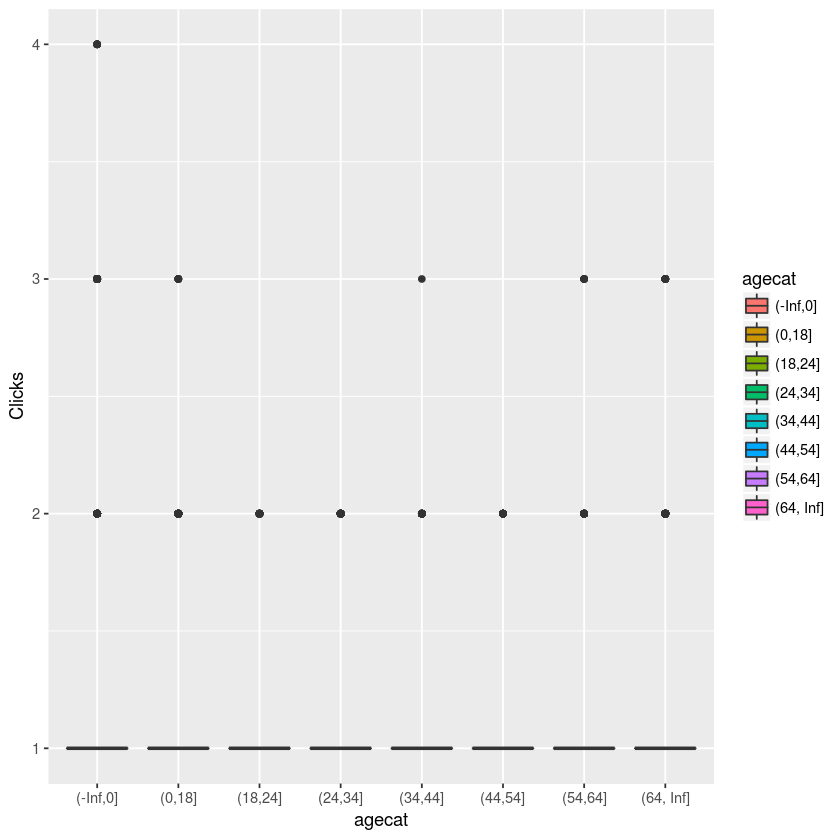

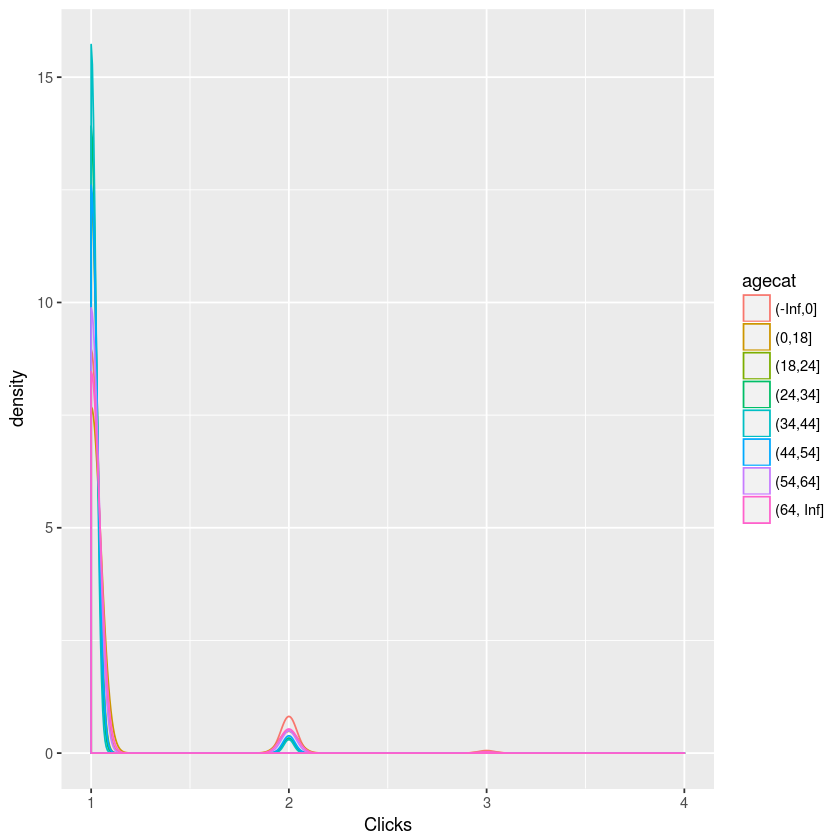

In [27]:
# 根据转化率创建点击， 如果没有印象，
# 不必在乎其是否点击， 如果没有印象的点击出现，
# 证明我对数据的假设是错误的
data1$hasimps <-cut(data1$Impressions,c(-Inf,0,Inf))
summaryBy(Clicks~hasimps, data =data1, FUN=siterange)
ggplot(subset(data1, Impressions>0), aes(x=Clicks/Impressions,colour=agecat)) + geom_density()
ggplot(subset(data1, Clicks>0), aes(x=Clicks/Impressions,colour=agecat)) + geom_density()
ggplot(subset(data1, Clicks>0), aes(x=agecat, y=Clicks, fill=agecat)) + geom_boxplot()
ggplot(subset(data1, Clicks>0), aes(x=Clicks, colour=agecat))+ geom_density()

In [28]:
# 分组
data1$scode[data1$Impressions==0] <- "NoImps"
data1$scode[data1$Impressions >0] <- "Imps"
data1$scode[data1$Clicks >0] <- "Clicks"

In [29]:
# 将列转换成一个因素
data1$scode <- factor(data1$scode)
head(data1)

Age,Gender,Impressions,Clicks,Signed_In,agecat,hasimps,scode
36,0,3,0,1,"(34,44]","(0, Inf]",Imps
73,1,3,0,1,"(64, Inf]","(0, Inf]",Imps
30,0,3,0,1,"(24,34]","(0, Inf]",Imps
49,1,3,0,1,"(44,54]","(0, Inf]",Imps
47,1,11,0,1,"(44,54]","(0, Inf]",Imps
47,0,11,1,1,"(44,54]","(0, Inf]",Clicks


In [30]:
# 查看水平
clen <- function(x){c(length(x))}
etable<-summaryBy(Impressions~scode+Gender+agecat,data = data1, FUN=clen)